
# Report: Correlation between rates of Gold Price and Crude Oil Price

### Author: **[Parth Ghinaiya](https://github.com/parth-ghinaiya)**

-----------------------------------------------------------------------------------------------------

## Introduction

In this report, we will explore the correlation between gold and crude oil prices. We have a dataset containing the prices of crude oil and gold from 1983 to 2020. Our objective is to analyze the correlation between these two commodities on a yearly basis.

Understanding the relationship between gold and crude oil prices can provide valuable insights for investors and market analysts. By examining the correlation, we can identify any patterns or trends that may exist and make informed decisions based on this analysis.

Let's dive into the data and explore the correlation between the rates of gold price and crude oil price for each year.


## Dataset Overview

In this project, we are working with these two datasets of kaggle:


**Datasource 1: Crude Oil Price**
- Metadata URL: [Crude Oil Price Metadata](https://www.kaggle.com/datasets/sc231997/crude-oil-price)
- Data URL: [Crude Oil Price Data](https://www.kaggle.com/datasets/sc231997/crude-oil-price/download?datasetVersionNumber=31)
- Data Type: CSV

**Datasource 2: Gold Price**
- Metadata URL: [Gold Prices Metadata](https://www.kaggle.com/datasets/odins0n/monthly-gold-prices)
- Data URL: [Gold Prices Data](https://www.kaggle.com/datasets/odins0n/monthly-gold-prices/download?datasetVersionNumber=4)
- Data Type: CSV


## Overview

**Steps:**
1. Data preparation: Installing dependencies, importing libraries, and loading data from a SQLite database.
2. Preprocessing data: Calculating the average yearly prices for gold and crude oil.
3. Visualizing data: Creating bar and line charts to visualize the average yearly prices.
4. Calculating correlation: Computing the correlation coefficient between gold and crude oil prices.
5. Conclusion: Summarizing the findings and suggesting further analysis.

## Preparation

### Install Dependencies

In [64]:
%pip install --upgrade pip
%pip install matplotlib==3.8.2
%pip install numpy==1.26.3
%pip install pandas==1.5.3
%pip install SQLAlchemy==1.4.46
%pip install kaggle==1.5.16

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import Dependencies

In [65]:
import subprocess
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine

In [66]:
# Run datapipeline to create database if it doesn't exist
subprocess.run(["./pipeline.sh"])

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


CompletedProcess(args=['./pipeline.sh'], returncode=0)

### Retrieve Data from Database

In [67]:
# Load data from database
crude_oil_price_db_engine = create_engine('sqlite:///../data/crude_oil_price.sqlite')
gold_price_db_engine = create_engine('sqlite:///../data/gold_price.sqlite')

# Create dataframe from database
crude_oil_price_df = pd.read_sql_table('crude_oil_price', crude_oil_price_db_engine)
gold_price_df = pd.read_sql_table('gold_price', gold_price_db_engine)

## Preprocess Data

In [68]:
# restore date with pandas datetime
crude_oil_price_df['date'] = pd.to_datetime(crude_oil_price_df['date'], format='%Y-%m-%d')
gold_price_df['date'] = pd.to_datetime(gold_price_df['Date'], format='%Y-%m-%d')

# Extract year from the date for grouping
crude_oil_price_df['year'] = crude_oil_price_df['date'].dt.to_period('Y').dt.year
gold_price_df['year'] = gold_price_df['date'].dt.to_period('M').dt.year

# only take data between year 1983 to 2020 
crude_oil_price_df = crude_oil_price_df[crude_oil_price_df['year'] >= 1983]
crude_oil_price_df = crude_oil_price_df[crude_oil_price_df['year'] <= 2020]

gold_price_df = gold_price_df[gold_price_df['year'] >= 1983]
gold_price_df = gold_price_df[gold_price_df['year'] <= 2020]


# Group by YearMonth and calculate the mean price
oil_yearly_avg = crude_oil_price_df.groupby('year')['price'].mean()
gold_yearly_avg = gold_price_df.groupby('year')['United States(USD)'].mean()

## Visualize Data  

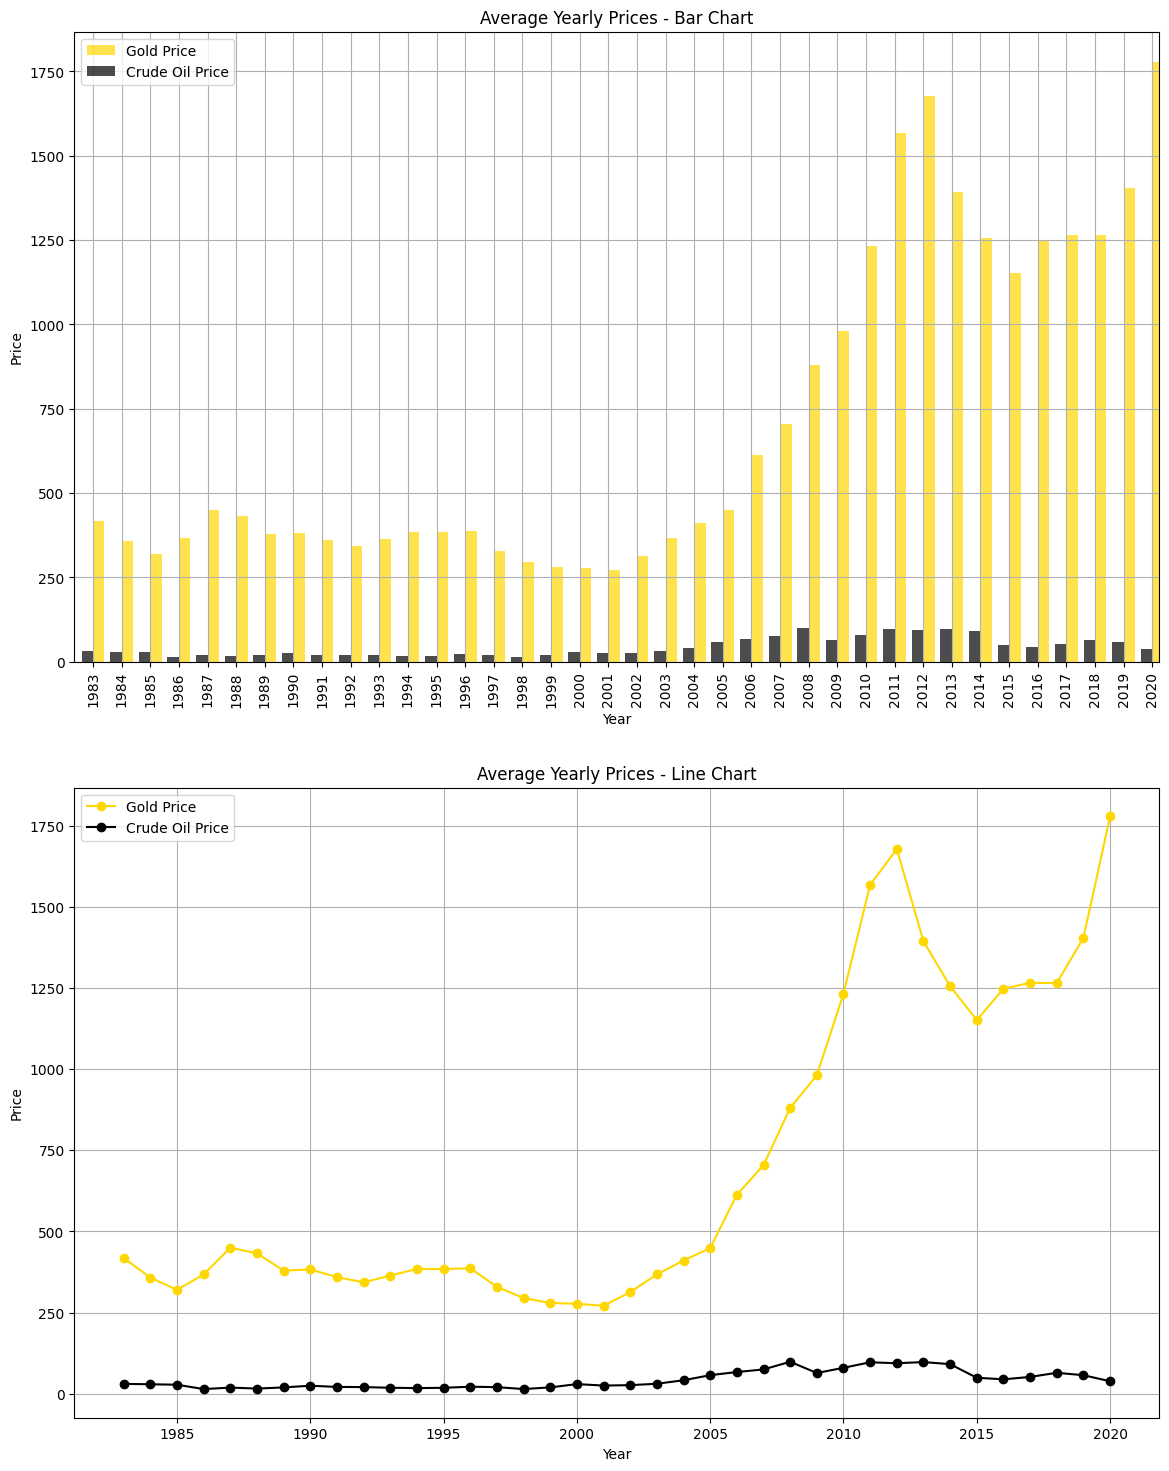

In [69]:
# Creating subplots with bar and line charts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 18))

# Bar chart
gold_yearly_avg.plot(kind='bar', color='gold', alpha=0.7, position=0, width=0.4, label='Gold Price', ax=ax1)
oil_yearly_avg.plot(kind='bar', color='black', alpha=0.7, position=1, width=0.4, label='Crude Oil Price', ax=ax1)

ax1.set_xlabel('Year')
ax1.set_ylabel('Price')
ax1.set_title('Average Yearly Prices - Bar Chart')
ax1.legend()
ax1.grid(True)

# Line chart
ax2.plot(gold_yearly_avg.index, gold_yearly_avg.values, marker='o', linestyle='-', color='gold', label='Gold Price')
ax2.plot(oil_yearly_avg.index, oil_yearly_avg.values, marker='o', linestyle='-', color='black', label='Crude Oil Price')

ax2.set_xlabel('Year')
ax2.set_ylabel('Price')
ax2.set_title('Average Yearly Prices - Line Chart')
ax2.legend()
ax2.grid(True)


## Calculate correlation

Month wise correlation: {1: 0.36, 2: 0.37, 3: 0.34, 4: 0.36, 5: 0.37, 6: 0.36, 7: 0.35, 8: 0.37, 9: 0.36, 10: 0.35, 11: 0.38, 12: 0.35}


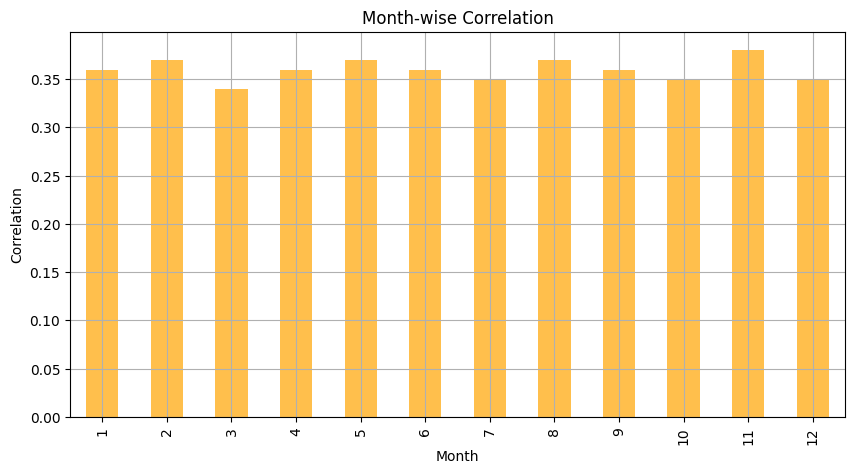

In [70]:
# Calculate month-wise correlation between gold and crude oil prices with 2f precision 
monthwise_correlation = crude_oil_price_df.groupby(crude_oil_price_df['date'].dt.month)['price'].corr(gold_price_df['United States(USD)']).round(2)

# Convert month-wise correlation to dictionary
monthwise_correlation_dict = monthwise_correlation.to_dict()

print(f"Month wise correlation: {monthwise_correlation_dict}")

# Plot month-wise correlation
fig, ax = plt.subplots(figsize=(10, 5))
monthwise_correlation.plot(kind='bar', color='orange', alpha=0.7, ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Correlation')
ax.set_title('Month-wise Correlation')
ax.grid(True)



In [71]:
# calculate overall correlation between gold and crude oil prices
correlation = crude_oil_price_df['price'].corr(gold_price_df['United States(USD)'])
print(f'Correlation between Gold Price and Crude Oil Price: {correlation: .2f}')

Correlation between Gold Price and Crude Oil Price:  0.36


## Conclusion

Based on the analysis performed, we can conclude that there is a moderate positive correlation (**0.36**) overall and the monthly correlations between crude oil and gold prices hover consistently around **0.34 to 0.38**. This suggests that there is some tendency for both prices to move in the same direction, although not consistently. It is important to note that the correlation is not very strong, but it is not negligible either.

Further analysis and research can be conducted to explore the factors influencing the correlation between gold and crude oil prices, and to identify any potential patterns or trends that may exist.

Overall, understanding the relationship between gold and crude oil prices can provide valuable insights for investors and market analysts in making informed decisions.
